In [1]:
# Install
!pip install seaborn scikit-learn

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files

In [7]:
import pandas as pd
# The 'uploaded' variable was not defined. Assuming the intent was to load 'spotify dataset.csv.xlsx'
file_path = '/content/sample_data/spotify dataset.csv.xlsx'
df = pd.read_excel(file_path)
print(df.head())
print(df.info())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [9]:
import pandas as pd
import numpy as np

# Step 1: Load Excel dataset
# df is already loaded from the previous cell, so this step is no longer needed.
# If you were to upload a new file, you would use google.colab.files.upload() first.
# for file in uploaded.keys():
#     df = pd.read_excel(file)

# Step 2: Basic info
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values before preprocessing:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

# Step 3: Remove duplicates
df = df.drop_duplicates()

# Step 4: Handle missing values
# Numeric → fill with mean
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

# Categorical → fill with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 5: Convert categorical columns into numeric (Encoding)
if 'playlist_genre' in df.columns:
    df['playlist_genre'] = df['playlist_genre'].astype('category').cat.codes

if 'playlist_name' in df.columns:
    df['playlist_name'] = df['playlist_name'].astype('category').cat.codes

# Step 6: Confirm changes
print("\nAfter Preprocessing:")
print("Shape of dataset:", df.shape)
print("\nMissing values after preprocessing:\n", df.isnull().sum())
print("\nFirst 5 rows after preprocessing:\n", df.head())

Shape of dataset: (32833, 23)

Columns:
 Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

Missing values before preprocessing:
 track_id                    0
track_name                  6
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            6
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness              

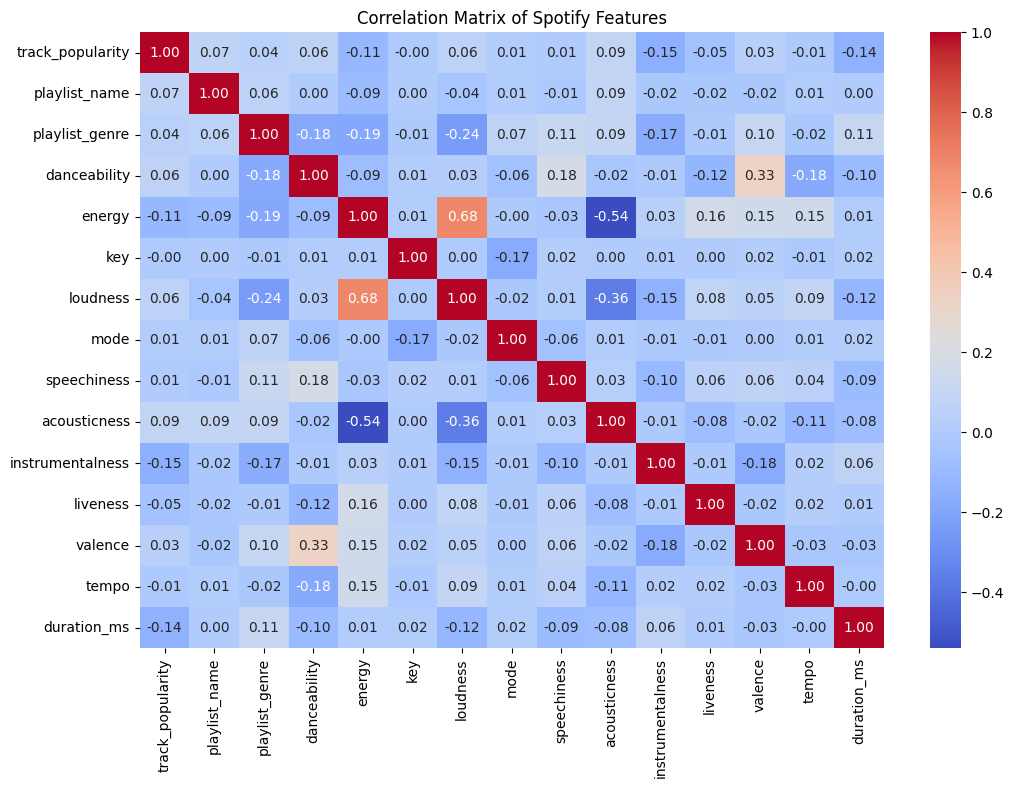

In [10]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Spotify Features")
plt.show()

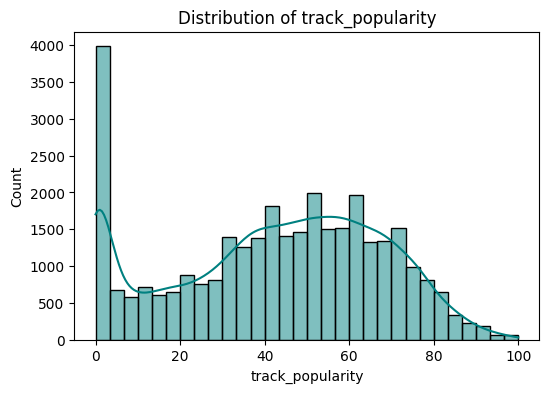

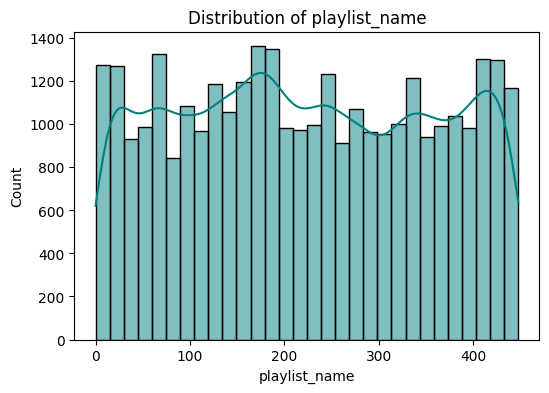

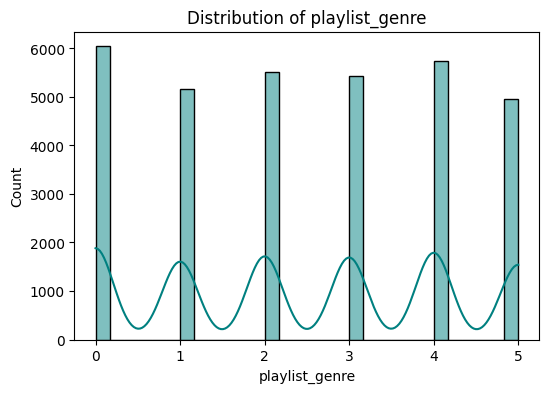

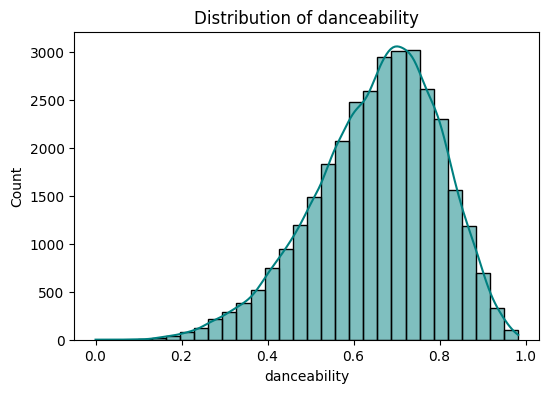

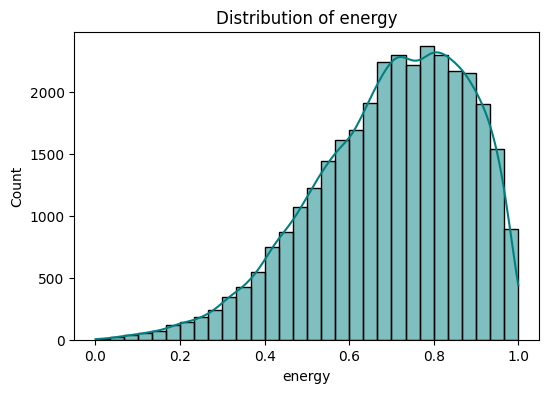

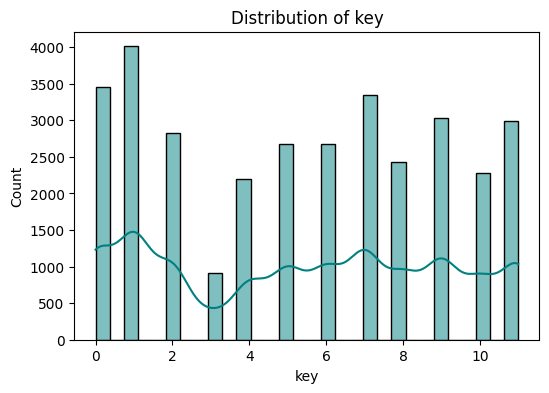

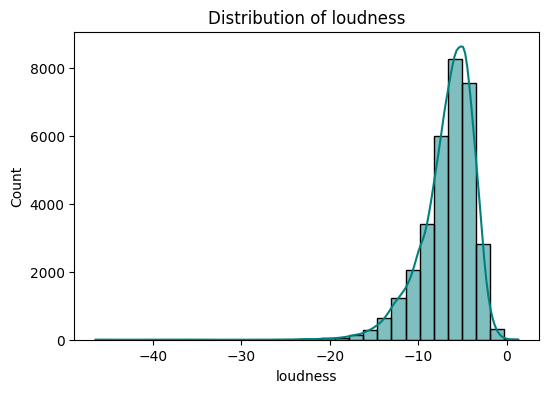

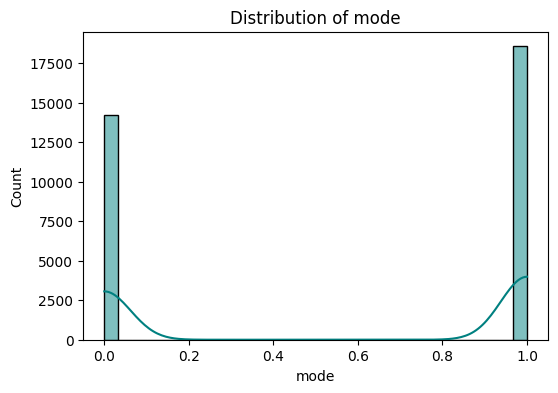

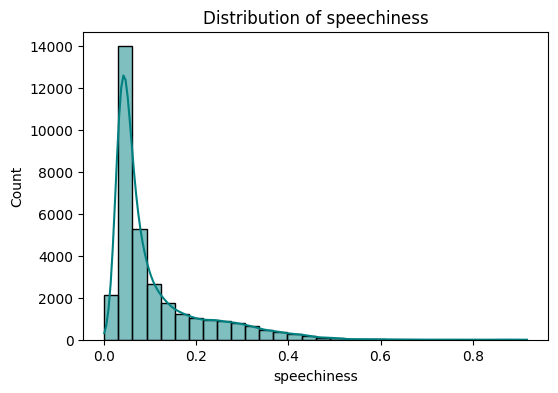

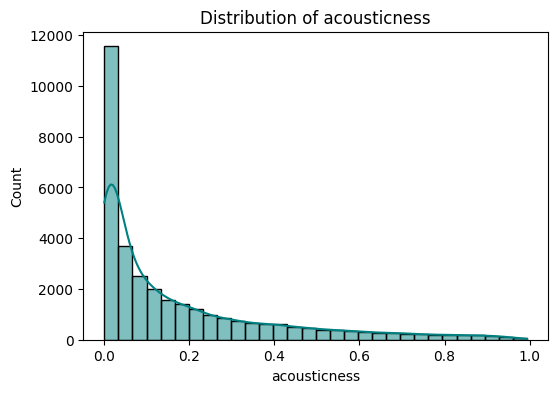

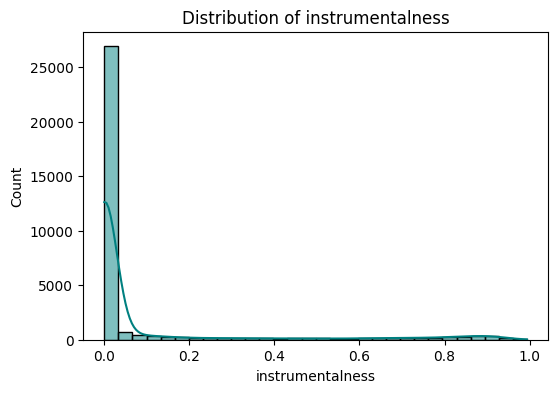

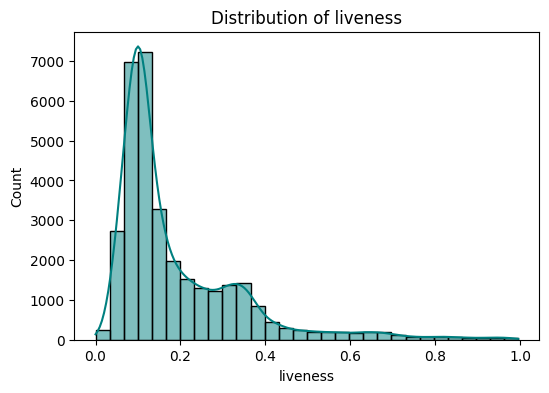

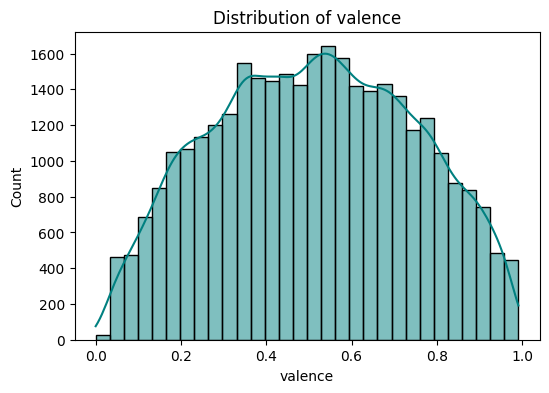

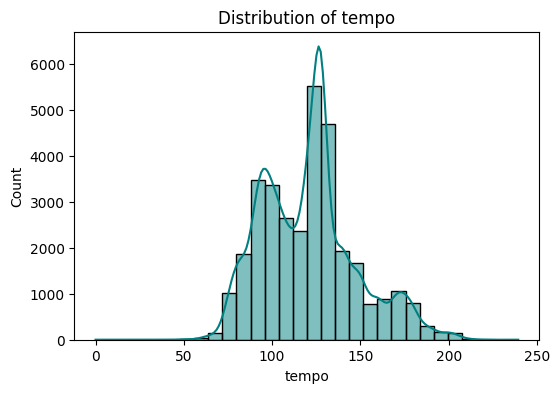

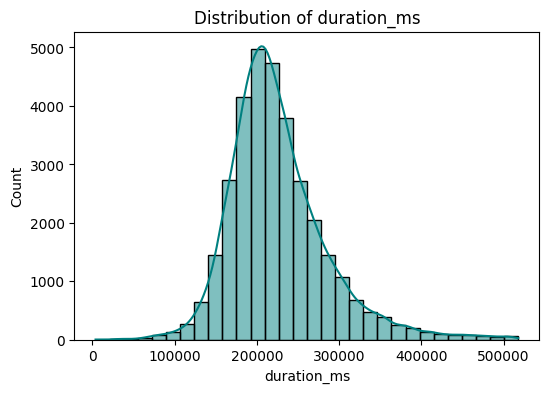

In [11]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color="teal")
    plt.title(f"Distribution of {col}")
    plt.show()


/tmp/ipython-input-3752035748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='playlist_genre', data=df, palette="viridis")


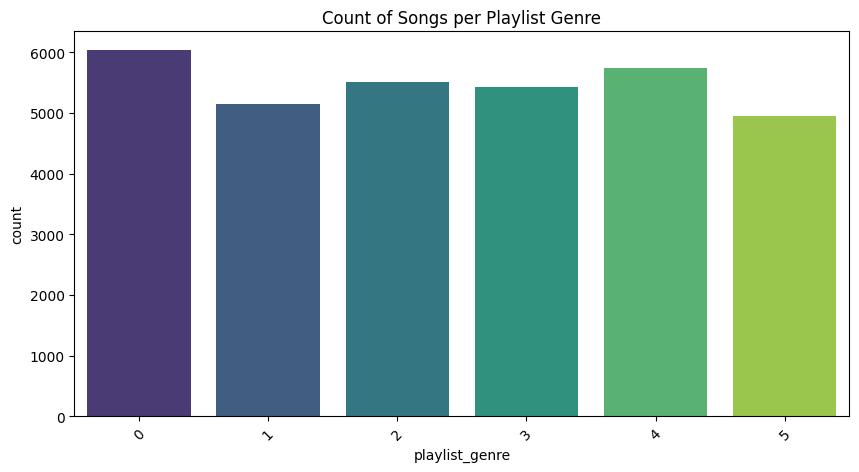

In [12]:
if 'playlist_genre' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x='playlist_genre', data=df, palette="viridis")
    plt.title("Count of Songs per Playlist Genre")
    plt.xticks(rotation=45)
    plt.show()


/tmp/ipython-input-2820298317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_playlists.index, y=top_playlists.values, palette="magma")


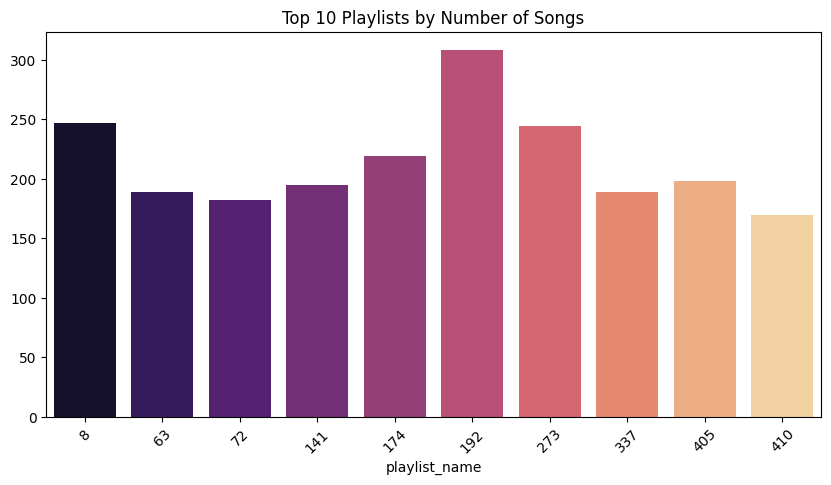

In [13]:
if 'playlist_name' in df.columns:
    top_playlists = df['playlist_name'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_playlists.index, y=top_playlists.values, palette="magma")
    plt.title("Top 10 Playlists by Number of Songs")
    plt.xticks(rotation=45)
    plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

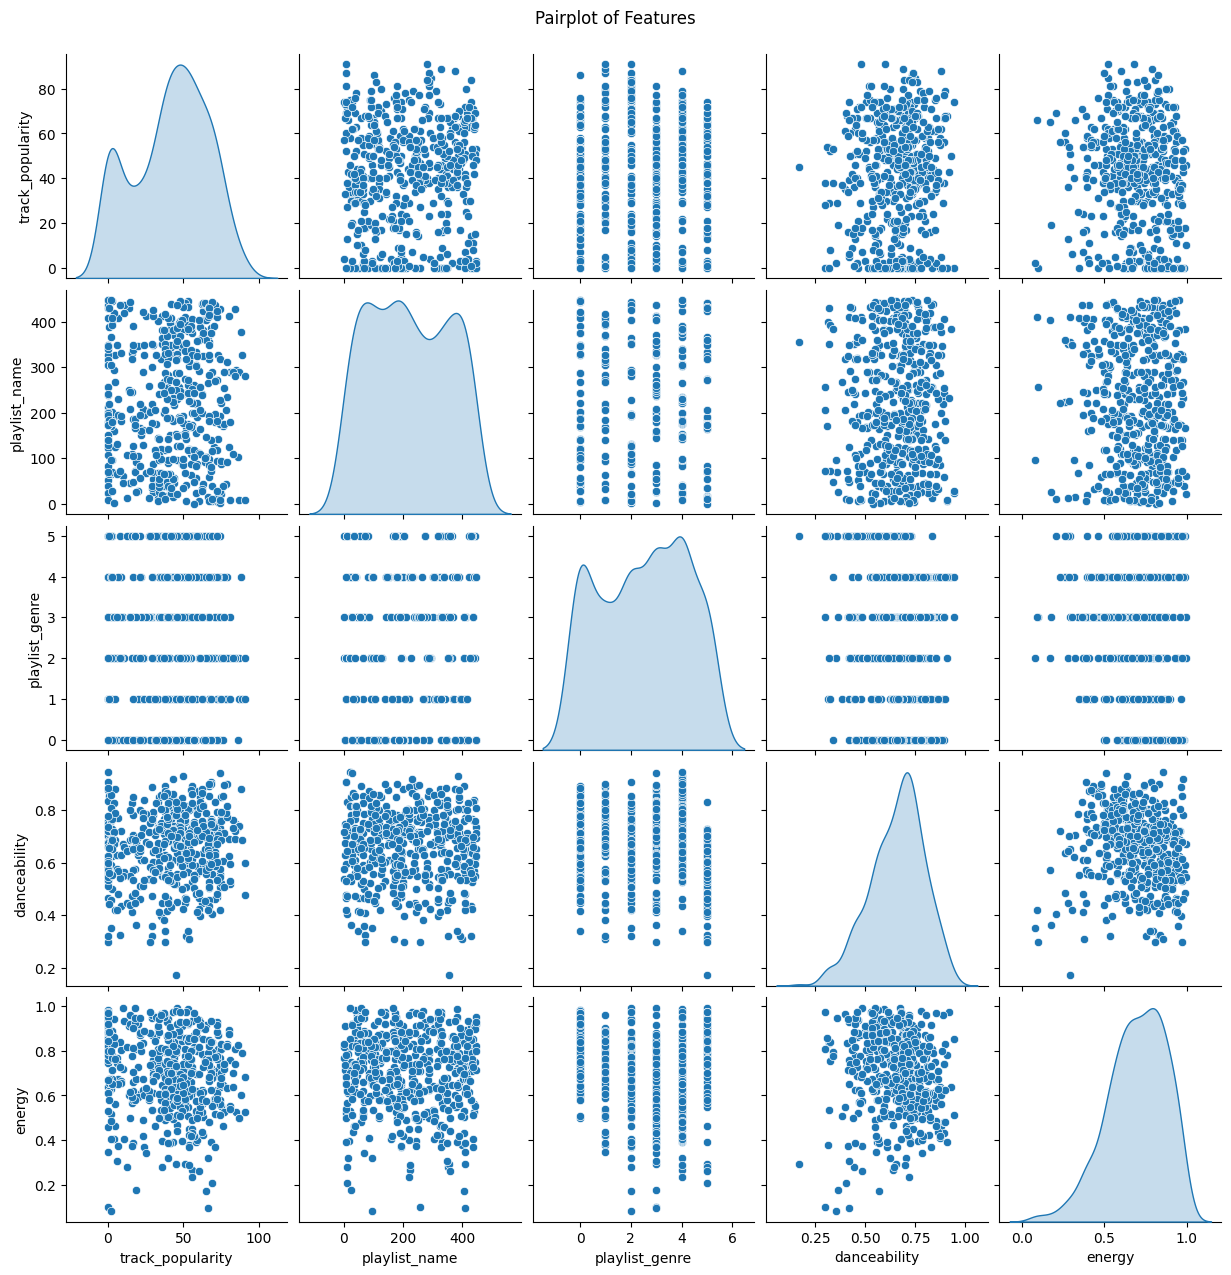

In [14]:
sample_df = df.sample(n=min(500, len(df)), random_state=42)  # बड़ा dataset हो तो sample
sns.pairplot(sample_df[numeric_cols[:5]], diag_kind='kde', palette="husl")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

/tmp/ipython-input-1676044104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playlist_genre', y=col, data=df, palette="Set2")


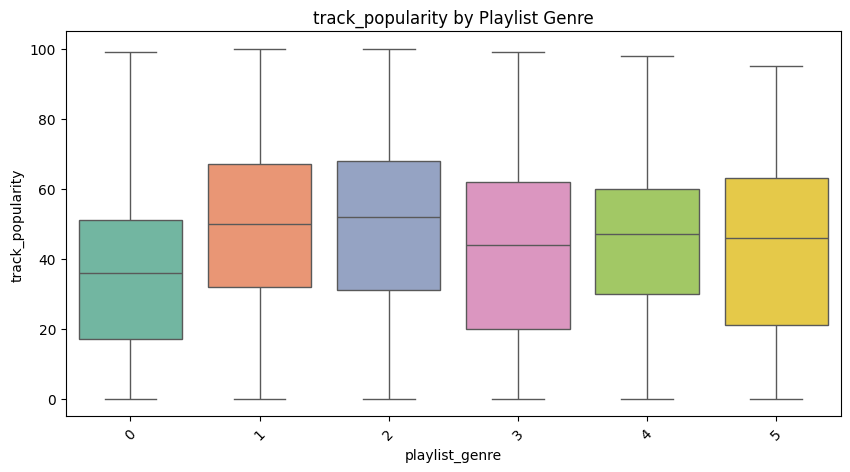

/tmp/ipython-input-1676044104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playlist_genre', y=col, data=df, palette="Set2")


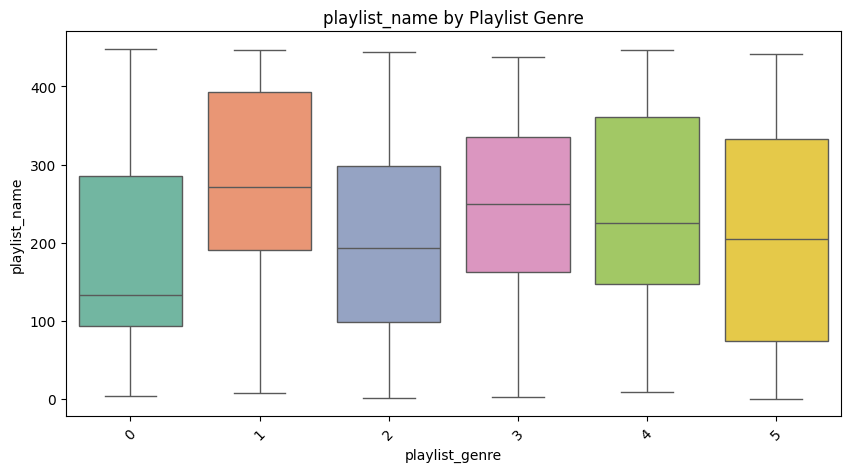

/tmp/ipython-input-1676044104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playlist_genre', y=col, data=df, palette="Set2")


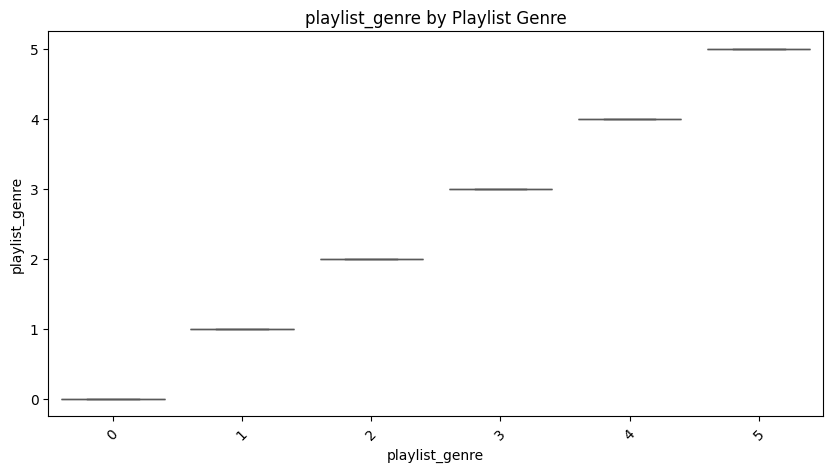

/tmp/ipython-input-1676044104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playlist_genre', y=col, data=df, palette="Set2")


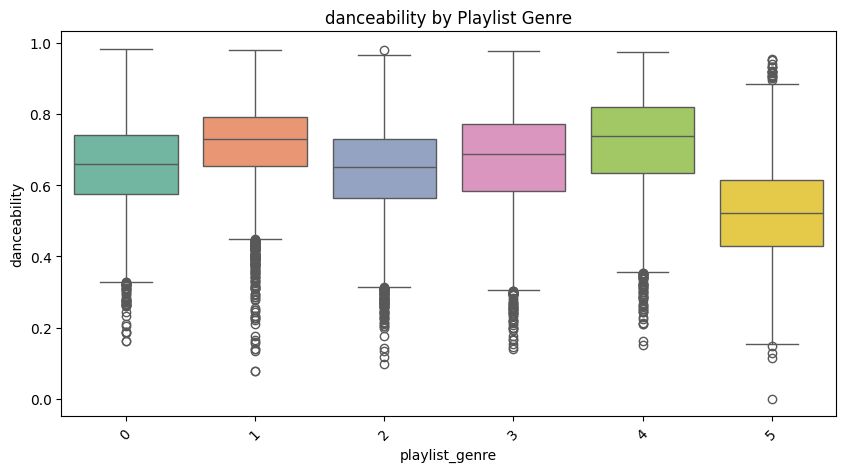

/tmp/ipython-input-1676044104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='playlist_genre', y=col, data=df, palette="Set2")


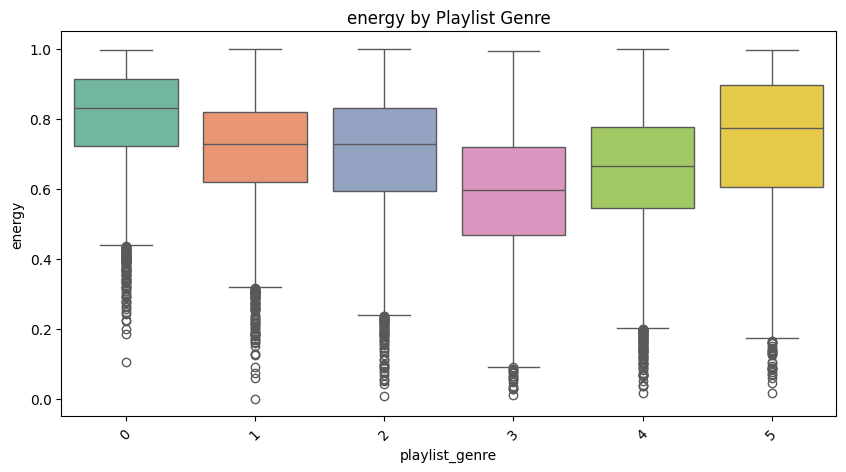

In [15]:
if 'playlist_genre' in df.columns:
    for col in numeric_cols[:5]:
        plt.figure(figsize=(10,5))
        sns.boxplot(x='playlist_genre', y=col, data=df, palette="Set2")
        plt.title(f"{col} by Playlist Genre")
        plt.xticks(rotation=45)
        plt.show()

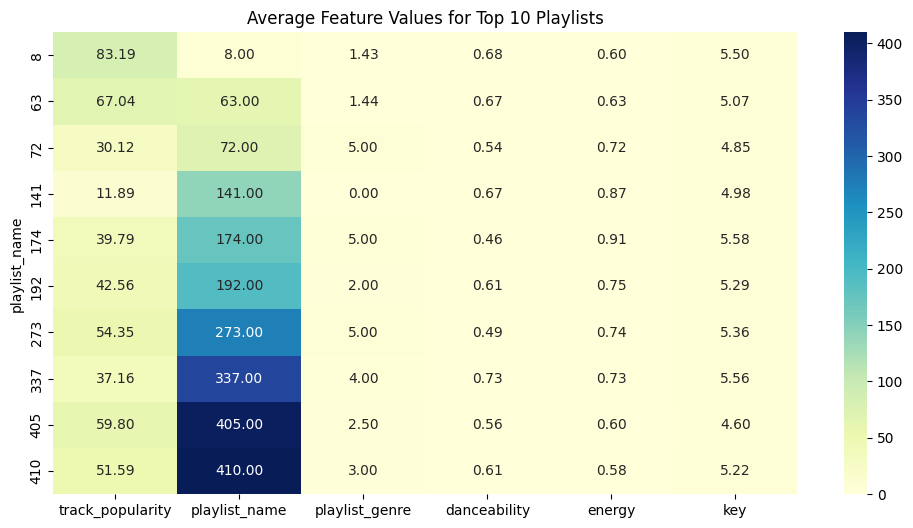

In [16]:
if 'playlist_name' in df.columns:
    top_playlists = df['playlist_name'].value_counts().head(10).index
    plt.figure(figsize=(12,6))
    sns.heatmap(df[df['playlist_name'].isin(top_playlists)].groupby('playlist_name')[numeric_cols[:6]].mean(),
                cmap="YlGnBu", annot=True, fmt=".2f")
    plt.title("Average Feature Values for Top 10 Playlists")
    plt.show()

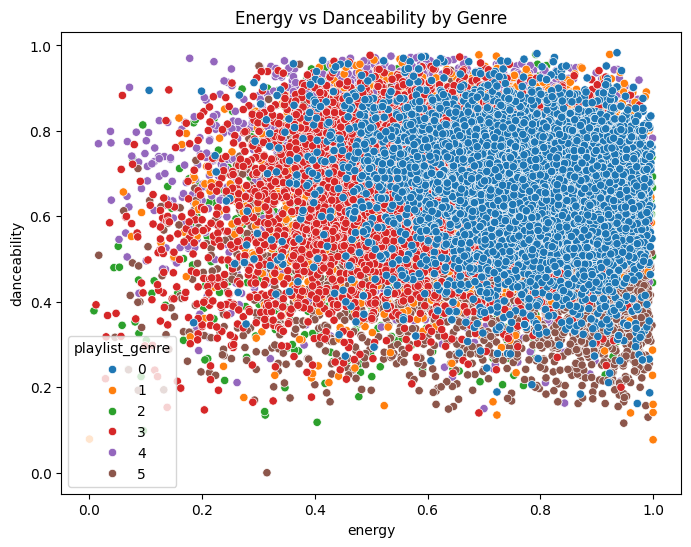

In [17]:
if 'energy' in df.columns and 'danceability' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='energy', y='danceability', hue='playlist_genre', data=df, palette="tab10")
    plt.title("Energy vs Danceability by Genre")
    plt.show()

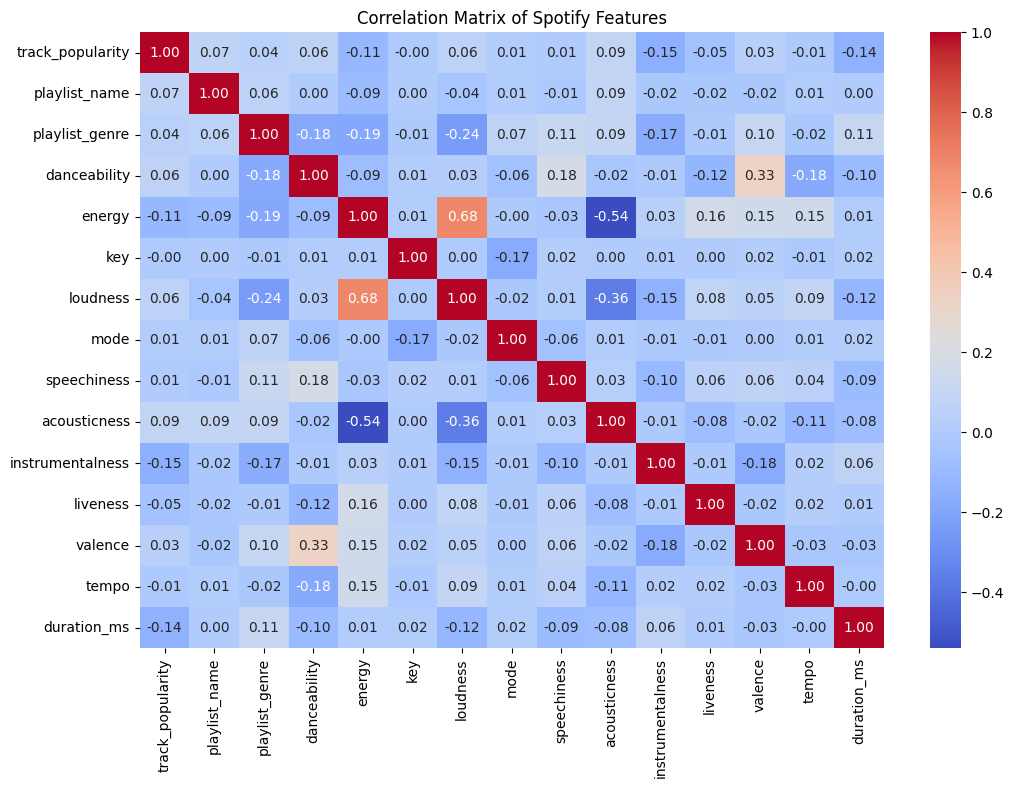

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Spotify Features")
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


numeric_df = df.select_dtypes(include=[np.number])


scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)


pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)


kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters

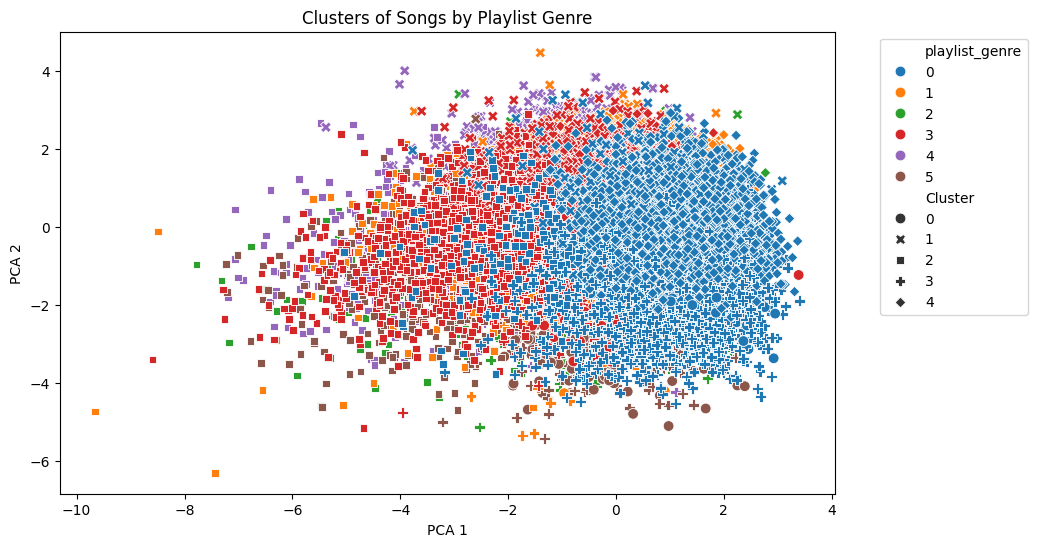

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'playlist_genre' in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1],
                    hue=df['playlist_genre'],
                    style=df['Cluster'], palette="tab10", s=60)
    plt.title("Clusters of Songs by Playlist Genre")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.show()

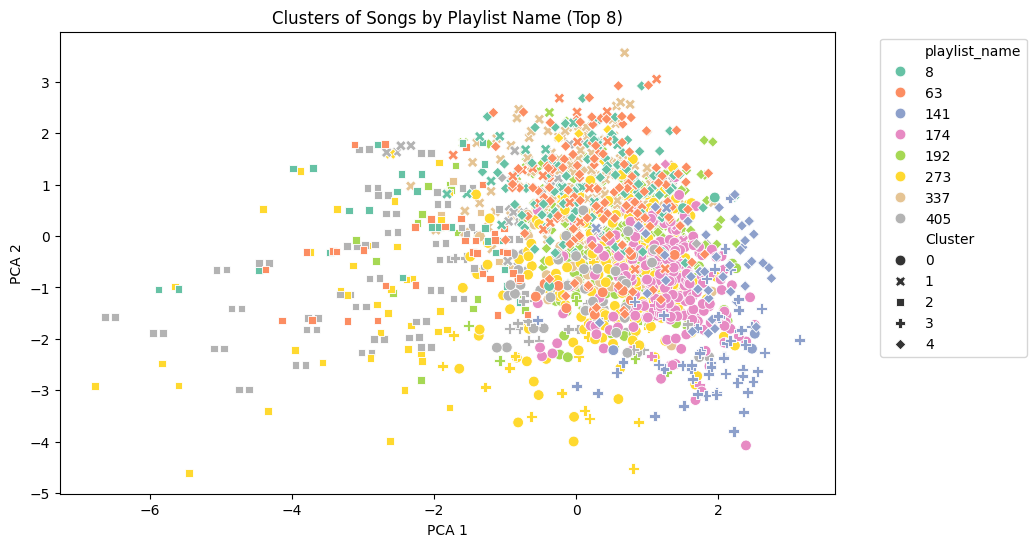

In [21]:
if 'playlist_name' in df.columns:
    plt.figure(figsize=(10,6))
    top_playlists = df['playlist_name'].value_counts().head(8).index  # सिर्फ top 8 playlists
    subset = df[df['playlist_name'].isin(top_playlists)]
    sns.scatterplot(x=pca_features[subset.index,0], y=pca_features[subset.index,1],
                    hue=subset['playlist_name'],
                    style=subset['Cluster'], palette="Set2", s=60)
    plt.title("Clusters of Songs by Playlist Name (Top 8)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.show()

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


numeric_df = df.select_dtypes(include=[np.number])


scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df)


cosine_sim_matrix = cosine_similarity(scaled_features)


def recommend_song(song_index, num_recommendations=5):

    similarity_scores = list(enumerate(cosine_sim_matrix[song_index]))

    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    similar_indices = [i[0] for i in similarity_scores[1:num_recommendations+1]]
    return df.iloc[similar_indices]


song_idx = np.random.randint(0, len(df))
print("🎶 Selected Song:")
print(df.iloc[song_idx])

print("\n✅ Recommended Songs:")
print(recommend_song(song_idx, num_recommendations=5))

🎶 Selected Song:
track_id                    47Slg6LuqLaX0VodpSCvPt
track_name                    Just the Way You Are
track_artist                            Bruno Mars
track_popularity                                77
track_album_id              6J84szYCnMfzEcvIcfWMFL
track_album_name              Doo-Wops & Hooligans
track_album_release_date       2010-10-05 00:00:00
playlist_name                                  371
playlist_id                 6a66cg3HcsjYkisYyQcov6
playlist_genre                                   1
playlist_subgenre                    latin hip hop
danceability                                 0.637
energy                                       0.843
key                                              5
loudness                                    -5.413
mode                                             1
speechiness                                 0.0432
acousticness                                0.0151
instrumentalness                               0.0
liveness      